#### Importing libraries

In [71]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [72]:
iris = pd.read_csv('C:/Users/harsh/anaconda3/archive/IRIS.csv')
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [73]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


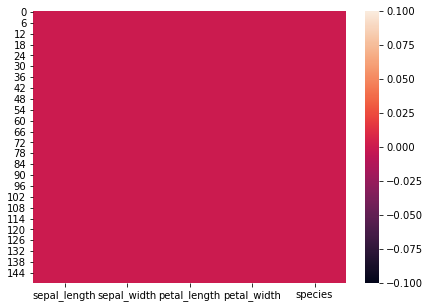

In [93]:
plt.figure(figsize = (7, 5))
sns.heatmap(iris.isnull())
plt.show()

#### No null values present in this dataset, confirmed using heatmap

<AxesSubplot:xlabel='species', ylabel='count'>

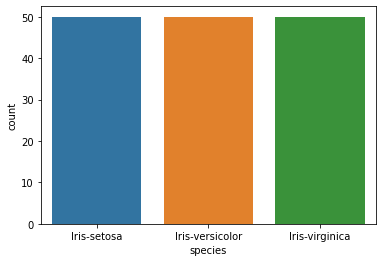

In [75]:
sns.countplot(x = 'species', data = iris)

In [76]:
iris.species.value_counts()

Iris-virginica     50
Iris-setosa        50
Iris-versicolor    50
Name: species, dtype: int64

#### Proved using EDA that there are 50 counts of each species that make up total of 150

<AxesSubplot:>

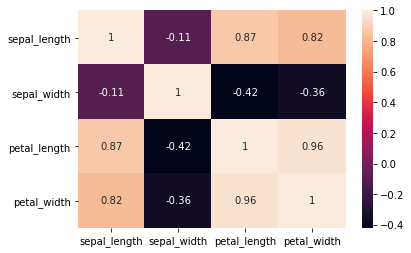

In [77]:
sns.heatmap(iris.corr(), annot = True)

In [78]:
iris.species.value_counts()

Iris-virginica     50
Iris-setosa        50
Iris-versicolor    50
Name: species, dtype: int64

#### Converting categorical values into numerical values

In [79]:
iris['species'] = iris['species'].replace({'Iris-virginica': 0, 'Iris-setosa': 1, 'Iris-versicolor': 2})

In [80]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


In [81]:
x = iris.iloc[:, :-1].values
y = iris.iloc[:, -1].values

In [82]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

#### Logistic Regression

In [83]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(random_state = 0)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

y_pred

C:\Users\harsh\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([0, 2, 1, 0, 1, 0, 1, 2, 2, 2, 0, 2, 2, 2, 2, 1, 2, 2, 1, 1, 0, 2,
       1, 1, 0, 1, 1, 2, 2, 1], dtype=int64)

#### Random Forest Regressor

In [85]:
from sklearn.ensemble import RandomForestRegressor

model1 = RandomForestRegressor(random_state = 0)
model1.fit(x_train, y_train)
y_pred1 = model.predict(x_test)

y_pred1

array([0, 2, 1, 0, 1, 0, 1, 2, 2, 2, 0, 2, 2, 2, 2, 1, 2, 2, 1, 1, 0, 2,
       1, 1, 0, 1, 1, 2, 2, 1], dtype=int64)

#### Decision Tree Regressor

In [87]:
from sklearn.tree import DecisionTreeRegressor

model2 = DecisionTreeRegressor(random_state = 0)
model2.fit(x_train, y_train)
y_pred2 = model.predict(x_test)

y_pred2

array([0, 2, 1, 0, 1, 0, 1, 2, 2, 2, 0, 2, 2, 2, 2, 1, 2, 2, 1, 1, 0, 2,
       1, 1, 0, 1, 1, 2, 2, 1], dtype=int64)

#### K Nearest Neighbors

In [108]:
from sklearn.neighbors import KNeighborsClassifier

model4 = KNeighborsClassifier()
model4.fit(x_train, y_train)
y_pred4 = model.predict(x_test)

y_pred4

array([0, 2, 1, 0, 1, 0, 1, 2, 2, 2, 0, 2, 2, 2, 2, 1, 2, 2, 1, 1, 0, 2,
       1, 1, 0, 1, 1, 2, 2, 1], dtype=int64)

#### Accuracy scores for various models

In [114]:
print('Score for Logistic Regression: ', model.score(x_test, y_pred))
print('-'*60)
print('Score for Random Forest Regressor: ', model1.score(x_test, y_pred1))
print('-'*60)
print('Score for Decision Tree Regressor: ', model2.score(x_test, y_pred2))
print('-'*60)
print('Score for KNN: ', model4.score(x_test, y_pred4))

Score for Logistic Regression:  1.0
------------------------------------------------------------
Score for Random Forest Regressor:  0.9622264875239923
------------------------------------------------------------
Score for Decision Tree Regressor:  1.0
------------------------------------------------------------
Score for KNN:  0.9666666666666667


#### As we see, Logistic Regression & Decision Tree Regressor are best performing models for this dataset